# smFISH Spot Detection

In [1]:
from merfishing import Merfish

## Entry Point

In [2]:
merfish = Merfish('dummy_experiment/output/region_0/')

MERFISH Experiment Region
Region data located at /gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0
Experiment dir located at /gale/netapp/cemba3c/merfish/example/dummy_experiment
/gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0 does not contain cellpose results or the results are incomplete, using watershed results from vizgen pipeline instead.


## Call Spots

In [3]:
merfish.smfish_genes

['Snap25', 'Mbp']

In [9]:
merfish.call_spots(
    image_names='all',
    cpu=15,
    padding=50,
    detect_dense=True,
    projection='max',
    verbose=False,
    redo=False,
)

## Plot

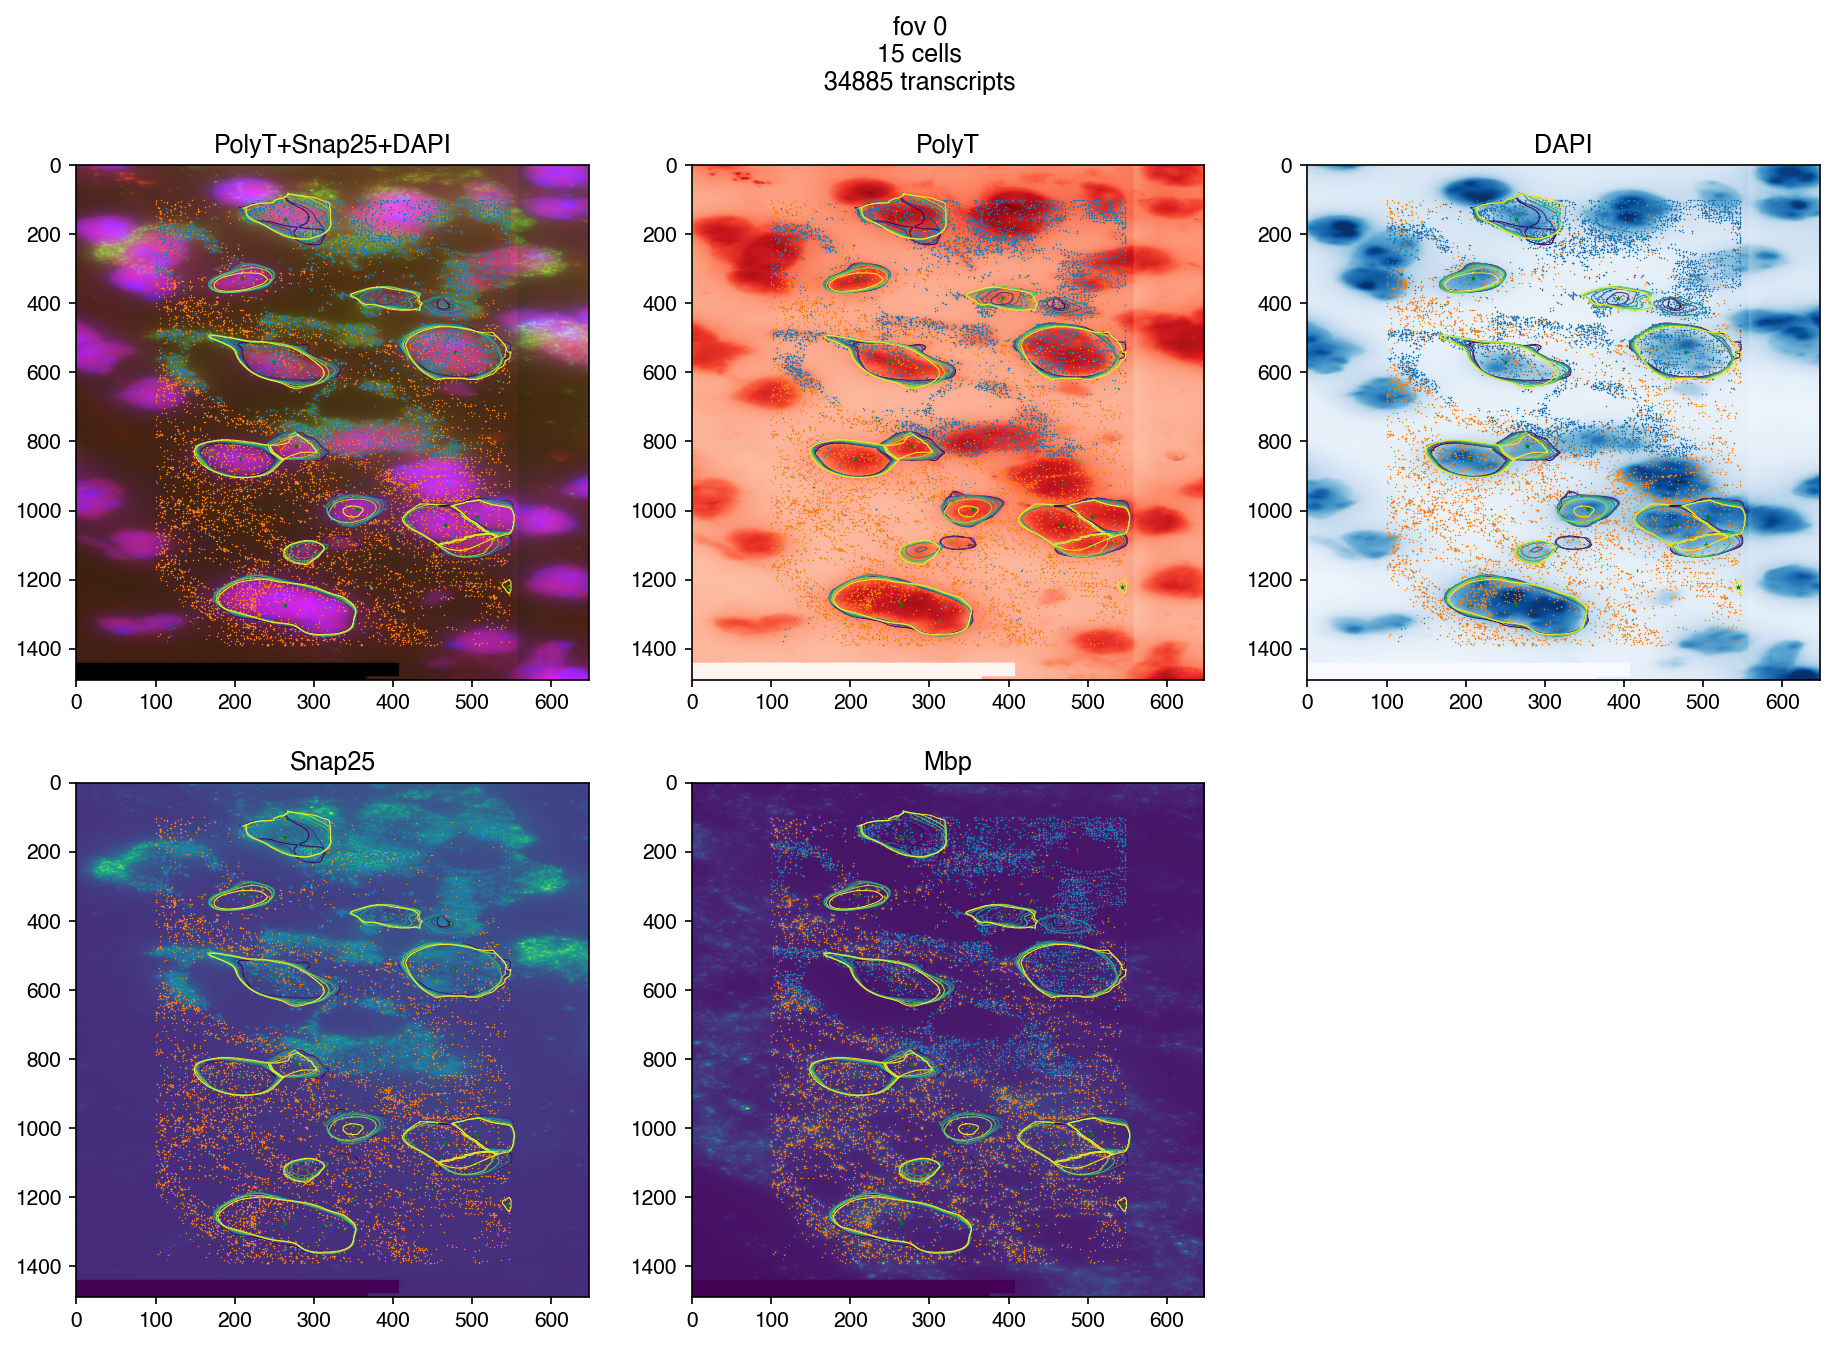

In [10]:
fig = merfish.plot_fov(
    0,
    n_cols=3,
    image_names=['PolyT+Snap25+DAPI', 'PolyT', 'DAPI'] + merfish.smfish_genes,
    genes=merfish.smfish_genes,
    dpi=150
)

## Transcripts

In [12]:
transcripts = merfish.get_transcripts(fov=0)

transcripts[transcripts['gene'].isin(merfish.smfish_genes)]

,barcode_id,global_x,global_y,global_z,x,y,fov,gene,transcript_id
0,550,285.535095,2393.415283,0,117.057625,-253.842117,0,Snap25,ENSMUST00000028727
1,550,286.183105,2393.415283,0,117.705612,-253.842117,0,Snap25,ENSMUST00000028727
2,550,295.794952,2393.415283,0,127.317474,-253.842117,0,Snap25,ENSMUST00000028727
3,550,303.894836,2393.415283,0,135.417358,-253.842117,0,Snap25,ENSMUST00000028727
4,550,276.679230,2393.631348,0,108.201759,-253.626114,0,Snap25,ENSMUST00000028727
...,...,...,...,...,...,...,...,...,...
1552,551,296.550934,2531.545166,5,128.073456,-115.712135,0,Mbp,ENSMUST00000133193
1553,551,288.775055,2531.977295,5,120.297577,-115.280144,0,Mbp,ENSMUST00000133193
1554,551,277.327240,2532.301270,5,108.849747,-114.956146,0,Mbp,ENSMUST00000133193
1555,551,273.547272,2532.409180,5,105.069801,-114.848145,0,Mbp,ENSMUST00000133193


## Details - BigFish Package

Spot detection is done by the bigfish package with its automatic pipeline and default parameters. Each z-plane is run separately. Please read the bigfish package for more details and fine tune the parameter if needed. You can pass the key parameters to merfish.call_spots function.
- Github: https://github.com/fish-quant/big-fish
- Documentation: https://big-fish.readthedocs.io/en/stable/index.html
- Jupyter Notebook Example: https://github.com/fish-quant/big-fish-examples/tree/master/notebooks

In [29]:
from bigfish.stack import maximum_projection
from bigfish.plot import plot_detection, plot_images
from bigfish.detection import detect_spots

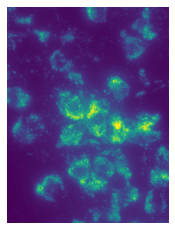

In [33]:
image = merfish.get_image_fov('Snap25', 2)
plot_images(maximum_projection(image), contrast=True, framesize=(3, 3))

In [37]:
spots, threshold = detect_spots(
    images=image[3],
    return_threshold=True,
    voxel_size=(103, 103),  # in nanometer (one value per dimension zyx)
    spot_radius=(150, 150))  # in nanometer (one value per dimension zyx)
print("detected spots")
print("\r shape: {0}".format(spots.shape))
print("\r dtype: {0}".format(spots.dtype))
print("\r threshold: {0}".format(threshold))

detected spots
 shape: (3100, 2)
 dtype: int64
 threshold: 226.0


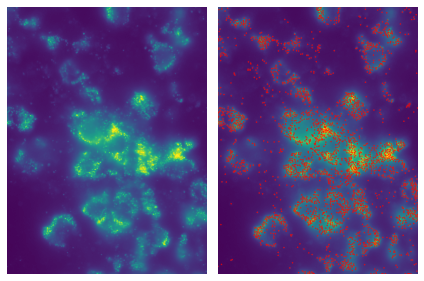

In [38]:
plot_detection(image[3], spots, contrast=True, framesize=(6, 6), radius=1)